# Boston Real estates Price Predoctor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDU,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTR,B,LST,MED
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDU    506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      501 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PTR     506 non-null    float64
 11  B       506 non-null    float64
 12  LST     506 non-null    float64
 13  MED     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDU,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTR,B,LST,MED
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286954,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705462,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# import matplotlib.pyplot as plt
# housing.hist(bins = 50 , figsize=(20,15))

# Train test spliting

In [8]:
#For undestanding
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
#train_set,test_set = split_train_test(housing,0.2)

In [10]:
#print(f"Rows in train set : {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state =42)

In [12]:
print(f"Rows in train set : {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set : 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits  = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
housing = strat_train_set.copy()

# Looking for Correlations

In [17]:
# from pandas.plotting import scatter_matrix
# attributes = ["RM","ZN","MED","LST"]
# scatter_matrix(housing[attributes],figsize= (12,8))

<AxesSubplot:xlabel='RM', ylabel='MED'>

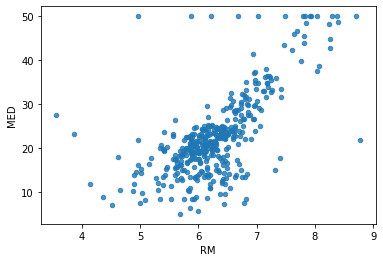

In [18]:
housing.plot(kind = "scatter",x="RM",y="MED",alpha=0.8)

In [19]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [20]:
housing.head()

,CRIM,ZN,INDU,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTR,B,LST,MED,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [21]:
corr_matrix = housing.corr()
corr_matrix['MED'].sort_values(ascending=False)

MED      1.000000
RM       0.680185
B        0.361761
ZN       0.339741
DIS      0.240451
CHAS     0.205066
AGE     -0.364596
RAD     -0.374693
CRIM    -0.393715
NOX     -0.422873
TAX     -0.456657
INDU    -0.473516
PTR     -0.493534
TAXRM   -0.530178
LST     -0.740494
Name: MED, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MED'>

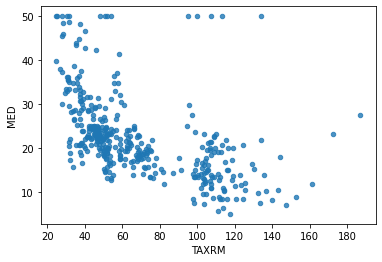

In [22]:
housing.plot(kind = "scatter",x="TAXRM",y="MED",alpha=0.8)

In [44]:
housing = strat_train_set.drop("MED",axis=1)
housing_labels = strat_train_set["MED"].copy
housing_labels

<bound method NDFrame.copy of 254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MED, Length: 404, dtype: float64>

# Missing Attribute

In [24]:
a = housing.dropna(subset=["RM"])
a.shape

(399, 13)

In [25]:
housing.drop("RM",axis=1).shape

(404, 12)

In [26]:
median = housing["RM"].median()
median

6.216

In [27]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [28]:
housing.shape

(404, 13)

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_.shape

(13,)

In [31]:
X = imputer.transform(housing)

In [32]:
housing_tr = pd.DataFrame(X,columns= housing.columns)

In [33]:
housing_tr.describe()

,CRIM,ZN,INDU,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTR,B,LST
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281936,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712230,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Creating PipeLine

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),    
])

In [48]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [47]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [37]:
housing_num_tr.shape

(404, 13)

## Selecting Desired Model

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

TypeError: Singleton array array(<bound method NDFrame.copy of 254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MED, Length: 404, dtype: float64>, dtype=object) cannot be considered a valid collection.